# Laboratorio de regresión - 2

|            |                |
|-------------------------|------------------------------------|
| **Nombre**             | Christopher Jacob Ahumada Robles  |
| **Fecha**              | 25/01/2025                        |
| **Expediente**         | 748077                            |
   |

## Regresión polinomial

Observa la siguiente gráfica.

In [105]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [36]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = 1 + 4*x**2 + np.random.normal(0, 1, 100)
plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x, y) 
plt.grid()


Utiliza `sklearn` para realizar una regresión lineal simple ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $)

In [39]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Transformar X de vector renglon a vector columna
x_reshaped = x.reshape(-1, 1)

# Modelo
model = LinearRegression()
model.fit(x_reshaped, y)

# Predicciones
y_pred = model.predict(x_reshaped)

# Calcular R2
r2 = r2_score(y, y_pred)

Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión. Calcula el métrico $R^2$.

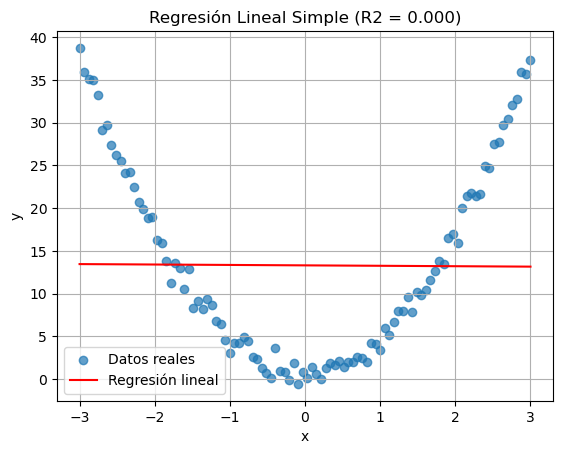

,Intercepto (b0),Coeficiente (b1),R2
0,13.302232,-0.049554,0.000058


In [45]:
# Grafica
plt.figure()
plt.scatter(x, y, label="Datos reales", alpha=0.7)
plt.plot(x, y_pred, color="red", label="Regresión lineal")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title(f"Regresión Lineal Simple (R2 = {r2:.3f})")
plt.grid()
plt.show()

# Guardamos los resultados en un df 
resultados = pd.DataFrame({
    "Intercepto (b0)": [model.intercept_],
    "Coeficiente (b1)": [model.coef_[0]],
    "R2": [r2]
})
resultados

Podemos ver que el ajuste no es correcto, pues parece que tiene un comportamiento cuadrático y estamos intentando ajustar una línea recta.

En lugar de hacer una regresión lineal simple, quizás podamos extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + ... + \beta_p X^p + \epsilon$$

Ajusta un modelo cuadrático con `sklearn` ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x + \hat{\beta_1}x^2 $) y calcula su $R^2$.

In [148]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

pol = PolynomialFeatures(degree=2, include_bias=True)
x_pol = pol.fit_transform(x_reshaped)
model = LinearRegression().fit(x_pol, y)
# Predicciones y r2
y_pred = model.predict(x_pol)
r2 = r2_score(y, y_pred)

In [150]:
resultados

,Intercepto (b0),Coeficiente (b1),R2
0,13.302232,-0.049554,0.000058


Crea una gráfica con las observaciones y la nueva curva que ajustaste.

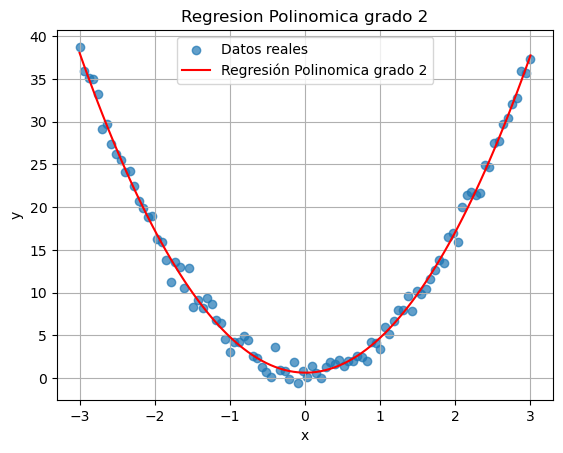

In [154]:
# Grafica
plt.figure()
plt.scatter(x, y, label="Datos reales", alpha=0.7)
plt.plot(x, y_pred, color="red", label="Regresión Polinomica grado 2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Regresion Polinomica grado 2")
plt.grid()
plt.show()

Ajusta modelos de grados 3, 5, 7, 9, y 11. Calcula su $R^2$.

Para no hacerlo manual se implementa como función

In [156]:
def regresiones(x, y, grados):
    resultados = [] #Lista vacia para almacenar resultados
    for g in grados:
        poly = PolynomialFeatures(degree=g, include_bias=False) # degree = grado maximo de la funcion, bias=columna de unos para b0
        x_poly = poly.fit_transform(x_reshaped) #Ajuste y transformacion (en este caso cada x elevada a su grado) 
        modelo = LinearRegression().fit(x_poly, y)#La regresion se entrenara con datos de entrada x_poly y regresso un valor y
        y_pred = modelo.predict(x_poly)
        r2 = r2_score(y, y_pred)
        resultados.append({
            "Grado": g,
            "Intercepto": round(modelo.intercept_, 4),
            "Coeficientes": [round(coef, 4) for coef in modelo.coef_],
            "R2": r2
        })
    df_resultados = pd.DataFrame(resultados)
    return df_resultados



grados = [2,3, 5, 7, 9, 11]
df_resultados =regresiones(x, y, grados)
df_resultados["Coeficientes"]=df_resultados["Coeficientes"].round(4)
df_resultados

,Grado,Intercepto,Coeficientes,R2
0,2,0.6194,"[-0.0496, 4.1439]",0.993412
1,3,0.6194,"[-0.0656, 4.1439, 0.0029]",0.993413
2,5,0.6337,"[-0.2764, 4.1283, 0.1101, 0.002, -0.0105]",0.993495
3,7,0.6102,"[-0.1752, 4.1822, 0.0107, -0.0156, 0.0133, 0.0...",0.993509
4,9,0.5890,"[-0.1108, 4.2654, -0.0924, -0.0656, 0.0572, 0....",0.993514
5,11,0.5671,"[0.0901, 4.3972, -0.5683, -0.1904, 0.3695, 0.0...",0.993534


Crea una gráfica por cada modelo con las observaciones y su curva.

In [159]:
df_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Grado         6 non-null      int64  
 1   Intercepto    6 non-null      float64
 2   Coeficientes  6 non-null      object 
 3   R2            6 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 324.0+ bytes


In [165]:
coeficientes

[0.0901,
 4.3972,
 -0.5683,
 -0.1904,
 0.3695,
 0.0518,
 -0.0914,
 -0.006,
 0.0099,
 0.0003,
 -0.0004]

In [161]:
# Ecuaciones polinómicas a partir del DataFrame con comprenhension 
# Crear funciones polinómicas a partir del DataFrame
def crear_funcion(intercepto, coeficientes):
    return lambda x: intercepto + sum(c * x**(i+1) for i, c in enumerate(coeficientes))

funciones = {
    f"polinomio_grado_{row['Grado']}": 
    crear_funcion(row['Intercepto'], row['Coeficientes'])
    for i, row in df_resultados.iterrows()
}

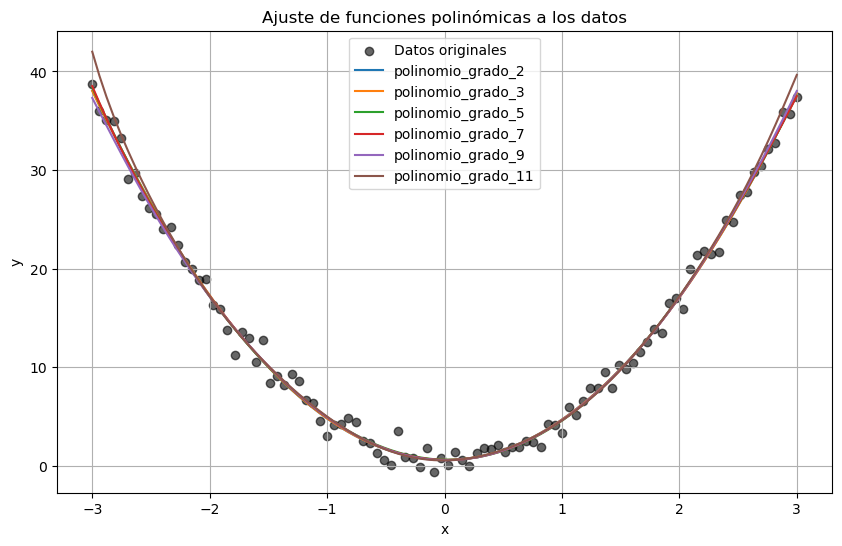

In [112]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', label='Datos originales', alpha=0.6)

# Graficar las funciones polinómicas
for nombre, funcion in funciones.items():
    plt.plot(x, funcion(x), label=nombre)

plt.title('Ajuste de funciones polinómicas a los datos')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

**¿Cuál modelo consideras que es mejor? ¿Por qué?**

In [115]:
max_r2 = df_resultados['R2'].max()
grado = df_resultados[df_resultados['R2'] == max_r2]['Grado']

In [117]:
grado.iloc[0]

11

### Segun la comparativa de maximo r2 es la de grado 11, no obstante la diferencia es minima entre ellos asi que en mi opinion podemos usar la cuadratica para reducir los recursos a utilizar y optimizar el proceso

Recuerda que una de las metas de ajustar modelos es para poder interpolar y extrapolar. Los datos que tenemos mantienen $x \in [-3, 3]$. ¿Qué pasaría si quisiéramos saber el valor de $y$ cuando $x=5$?

Calcula la predicción $\hat{y}$ para todos los modelos creados (grados 2, 3, 5, 7, 9, y 11).

In [120]:
x_pred = 5
predicciones = []

In [138]:
predicciones = []

x_pred = 5
for i, row in df_resultados.iterrows():
    grado = row['Grado']
    intercepto = row['Intercepto']
    coeficientes = row['Coeficientes']
    y_pred = intercepto + sum(c * x_pred**(i + 1) for i, c in enumerate(coeficientes))
    predicciones.append({'Grado': grado, 'Predicción': round(y_pred, 2)})

df_predicciones = pd.DataFrame(predicciones)

In [140]:
df_predicciones

,Grado,Predicción
0,2,103.97
1,3,104.25
2,5,84.66
3,7,34.31
4,9,286.00
5,11,-4865.03


¿Cuál modelo crees que sea mejor?

La cuadratica

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3